<a href="https://colab.research.google.com/github/creative-dana/ds-cs-section2-sprint2/blob/master/n221-decision-trees/n221a_sol_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# üìù Assignment
---

# Decision Trees(Í≤∞Ï†ïÌä∏Î¶¨)

## Ï∫êÍ∏Ä Ïù∏ÌÅ¥ÎûòÏä§(InClass) Competitions

### 1) EDAÎ•º ÏàòÌñâÌï©ÏãúÎã§

- [Ï∫êÍ∏Ä Í≥ÑÏ†ïÏùÑ ÎßåÎìúÏÑ∏Ïöî](https://www.kaggle.com/), Í≥µÏú†Îêú Ïù∏ÌÅ¥ÎûòÏä§ ÎåÄÌöå urlÏùÑ ÌÜµÌï¥ Ïù¥ÎèôÌïú ÌõÑ ÎåÄÌöåÏóê Ï∞∏Ïó¨ÌïòÏÑ∏Ïöî.
- H1N1 Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†®/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ ÏÖãÏúºÎ°ú ÎÇòÎàÑÏñ¥ Ï§ÄÎπÑÌïòÏÑ∏Ïöî
- profilingÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Í≥†, missing value, zeros, cardinarity Îì±ÏùÑ ÌôïÏù∏ÌïòÏó¨ Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
- Î≥∏Ïù∏ÎßåÏùò ÌäπÏÑ±Í≥µÌïôÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî.
- **(Í∞ùÍ¥ÄÏãù) H1N1 Î∂ÑÎ•òÍ∏∞Ïùò Í∏∞Ï§ÄÎ™®Îç∏ÏùÑ ÏÑ§Ï†ïÌïòÏÑ∏Ïöî. Í∏∞Ï§ÄÎ™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import graphviz
from sklearn.tree import export_graphviz

In [ ]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'

train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

### Ïª¨Îüº ÏÑ§Î™Ö

In [ ]:
# Ïª¨ÎüºÎ™Ö ÌôïÏù∏
train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_insurance',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'agegrp',
       'education_comp', 'raceeth4_i', 'sex_i', 'inc_pov', 'marital',
       'rent_own_r', 'employment_status', 'census_region', 'census_msa',
       'n_adult_r', 'household_children', 'n_people_r', 'employment_industry',
       'employment_occupation', 'hhs_region', 'state', 'vacc_h1n1_f'],
      dtype='object')

targets
  - vacc_h1n1_f : H1N1ÎèÖÍ∞ê Î∞±Ïã† Î∞òÏùë (Ïù¥ Î¨∏Ï†úÏùò label)
  - vacc_ease_f : Í≥ÑÏ†àÏÑ± ÎèÖÍ∞ê Î∞±Ïã† Î∞òÏùë


Î™®Îì† binary binary Î≥ÄÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∑úÏπôÏùÑ Îî∞Î¶ÖÎãàÎã§.
0 : No / 1 : Yes

1. h1n1_concern : H1N1Î∞±Ïã†Ïóê ÎåÄÌïú Ïö∞Î†§ Ï†ïÎèÑ
    - 0 : Ï†ÑÌòÄ Ïö∞Î†§ÎêòÏßÄ ÏïäÏùå
    - 1 : Í∑∏Îã§ÏßÄ Ïö∞Î†§ÎêòÏßÄ ÏïäÏùå
    - 2 : Îã§ÏÜå Ïö∞Î†§Îê®
    - 3 : Îß§Ïö∞ Í±±Ï†ïÎê®

2. h1n1_knowledge : H1N1Î∞±Ïã†Ïóê ÎåÄÌï¥ ÏñºÎßàÎÇò Ïûò ÏïåÍ≥† ÏûàÎäîÍ∞Ä?
    - 0 : ÏïÑÎäî Í≤ÉÏù¥ Ï†ÑÌòÄ ÏóÜÎã§
    - 1 : Ï°∞Í∏à ÏïåÍ≥† ÏûàÎã§.
    - 2 : Îß§Ïö∞ Ïûò ÏïåÍ≥† ÏûàÎã§.

3. behavioral_antiviral_meds - Ìï≠ÏÉùÏ†ú Î≥µÏö© Ïó¨Î∂Ä (binary)

4. behavioral_avoidance - ÎèÖÍ∞ê Ïú†Ï¶ùÏÉÅÏûêÏôÄÏùò Ï†ëÏ¥âÏùÑ ÌîºÌï¥ÏôîÎäîÍ∞Ä?

5. behavioral_face_mask - ÎßàÏä§ÌÅ¨Î•º Ï∞©Ïö© ÌïòÏòÄÎäîÍ∞Ä?

6. behavioral_wash_hands - ÏÜêÏùÑ ÏûêÏ£º ÏîªÍ±∞ÎÇò ÏÑ∏Ï†ïÏ†úÎ•º ÏÇ¨Ïö©ÌïòÏòÄÎäîÍ∞Ä? 

7. behavioral_large_gatherings - ÎåÄÍ∑úÎ™® ÏßëÎã® Î™®ÏûÑ Ï∞∏ÏÑùÏùÑ Ï§ÑÏòÄÎäîÍ∞Ä? 

8. behavioral_outside_home - ÎèôÍ±∞Ïù∏ Ïô∏Ïùò ÏÇ¨ÎûåÎì§Í≥ºÏùò Ï†ëÏ¥âÏùÑ ÌîºÌïòÏòÄÎäîÍ∞Ä?

9. behavioral_touch_face - Îàà, ÏΩî, ÏûÖ Îì±ÏùÑ ÎßåÏßÄÏßÄ ÏïäÏïòÎäîÍ∞Ä?

10. doctor_recc_h1n1 - ÏùòÏÇ¨ÏóêÍ≤å H1N1ÎèÖÍ∞ê Î∞±Ïã† Ìà¨Ïó¨Î•º Í∂åÏú†Î∞õÏïòÎäîÍ∞Ä? 

11. doctor_recc_seasonal - ÏùòÏÇ¨ÏóêÍ≤å Í≥ÑÏ†àÏÑ± ÎèÖÍ∞ê Î∞±Ïã† Ìà¨Ïó¨Î•º Í∂åÏú†Î∞õÏïòÎäîÍ∞Ä?

12. chronic_med_condition - Îã§ÏùåÏùò ÎßåÏÑ±ÏßàÌôòÏúºÎ°ú Ïù∏Ìï¥ ÏïΩÎ¨ºÏùÑ Î≥µÏö©ÌïòÍ≥† ÏûàÎäîÍ∞Ä? (Îã§Ïùå : Ï≤úÏãù ÎòêÎäî Í∏∞ÌÉÄ Ìèê ÏßàÌôò, ÎãπÎá®Î≥ë, Ïã¨Ïû• ÏßàÌôò, Ïã†Ïû• ÏßàÌôò, Í≤∏ÏÉÅ Ï†ÅÌòàÍµ¨ ÎπàÌòà ÎòêÎäî Í∏∞ÌÉÄ ÎπàÌòà, Ïã†Í≤Ω ÌïôÏ†Å ÎòêÎäî Ïã†Í≤ΩÍ∑º ÏßàÌôò, Í∞Ñ ÏßàÌôò ÎòêÎäî ÎßåÏÑ± ÏßàÌôò ÎòêÎäî ÏïΩÎ¨º Î≥µÏö©ÏúºÎ°ú Ïù∏Ìïú Î©¥Ïó≠ Ï≤¥Í≥Ñ ÏïΩÌôî ÎßåÏÑ± ÏßàÌôò)

13. child_under_6_months - 6Í∞úÏõî ÎØ∏Îßå ÏòÅÏïÑÏôÄ Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú Í∏¥Î∞ÄÌûà Ï†ëÏ¥âÏùÑ Ìïú Ï†ÅÏù¥ ÏûàÎäîÍ∞Ä?

14. health_insurance - Í±¥Í∞ï Î≥¥ÌóòÏóê Í∞ÄÏûÖÎêòÏñ¥ ÏûàÎäîÍ∞Ä?

15. health_worker - ÏùòÎ£åÍ≥Ñ Ï¢ÖÏÇ¨ÏûêÏù∏Í∞Ä?

16. opinion_h1n1_vacc_effective H1N1Î∞±Ïã†Ïùò Ìö®Í≥ºÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å
    - Not at all effective
    - Not very effective
    - Don't know
    - Somewhat effective
    - Very effective

17. opinion_h1n1_risk - H1N1Î∞±Ïã†Ïùò ÏúÑÌóòÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å
    - Very Low
    - Somewhat low
    - Don't know
    - Somewhat high
    - Very high

18. opinion_h1n1_sick_from_vacc - H1N1Î∞±Ïã† Ìà¨Ïó¨ ÌõÑ ÏßàÎ≥ëÏóê Í±∏Î¶¥ ÏàòÎèÑ ÏûàÎäî ÏúÑÌóòÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å 
    - Not at all worried
    - Not very worried
    - Don't know
    - Somewhat worried
    - Very worried

19. opinion_seas_vacc_effective - Í≥ÑÏ†àÏÑ± Î∞±Ïã†Ïùò Ìö®Í≥ºÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å
    - Not very effective
    - Don't know
    - Somewhat effective
    - Very effective

20. opinion_seas_risk - Í≥ÑÏ†àÏÑ± Î∞±Ïã†Ïùò ÏúÑÌóòÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å
    - Very Low
    - Somewhat low
    - Don't know
    - Somewhat high
    - Very high

21. opinion_seas_sick_from_vacc - Í≥ÑÏ†àÏÑ± Î∞±Ïã† Ìà¨Ïó¨ ÌõÑ ÏßàÎ≥ëÏóê Í±∏Î¶¥ ÏàòÎèÑ ÏûàÎäî ÏúÑÌóòÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å
    - Not at all worried
    - Not very worried
    - Don't know
    - Somewhat worried
    - Very worried

22. agegrp - ÏùëÎãµÏûêÏùò Ïó∞Î†πÎ≥Ñ Í∑∏Î£π
    - 6 Months - 9 Years
    - 10 - 17 Years
    - 18 - 34 Years
    - 35 - 44 Years
    - 45 - 54 Years
    - 55 - 64 Years
    - 65+ Years

23. education_comp - ÏùëÎãµÏûê Ïä§Ïä§Î°úÍ∞Ä ÎãµÌïú ÍµêÏú° Ïù¥Ïàò ÏàòÏ§Ä
    - 1 = < 12 Years
    - 2 = 12 Years
    - 3 = Some College
    - 4 = College Graduate

24. raceeth4_i - ÏùëÎãµÏûêÏùò Ïù∏Ï¢Ö
    - 1 = Hispanic
    - 2 = Non-Hispanic, Black Only
    - 3 = Non-Hispanic, White Only
    - 4 = Non-Hispanic, Other or Multiple Races

25. sex_i - ÏùëÎãµÏûêÏùò ÏÑ±Î≥Ñ
  - 1 = Male
  - 2 = Female

24. inc_pov - 2008 ÎÖÑ Ïù∏Íµ¨ Ï°∞ÏÇ¨ ÎπàÍ≥§ Í∏∞Ï§ÄÍ≥º Í¥ÄÎ†®ÌïòÏó¨ ÏùëÎãµÏûêÏùò Í∞ÄÍµ¨ Ïó∞Í∞Ñ ÏÜåÎìù
    - 1 = > $75,000
    - 2 = <= $75,000
    - 3 = Below Poverty
    - 4 = Unknown

25. marital - ÏùëÎãµÏûêÏùò Í≤∞Ìòº Ïó¨Î∂Ä
    - 1 = Married
    - 2 = Not Married

26. rent_own_r - ÏùëÎãµÏûêÏùò Í±∞Ï£º ÌòÑÌô©
    - 1 = Home is Owned
    - 2 = Home is Rented or Other Arrangement

27. employment_status - ÏùëÎãµÏûêÏùò Í∑ºÎ°ú ÌòÑÌô©
    - Employed
    - Not in Labor Force
    - Unemployed

28. census_region - Ïã§Ï†ú Ïù∏Íµ¨ Ï°∞ÏÇ¨ Í±∞Ï£º ÏßÄÏó≠
    - 1=northeast
    - 2=midwest
    - 3=south
    - 4=west

29. census_msa -ÎØ∏Íµ≠ Ïù∏Íµ¨ Ï°∞ÏÇ¨ÏóêÏÑú Ï†ïÏùòÌïú ÎåÄÎèÑÏãú ÌÜµÍ≥Ñ ÏßÄÏó≠ (MSA) ÎÇ¥ ÏùëÎãµÏûêÏùò Í±∞Ï£ºÏßÄ.

30. n_adult_r - Í±∞Ï£º Íµ¨ÏÑ±Ïõê Ï§ë Ïñ¥Î•∏ Ïù∏Ïõê Ïàò

31. household_children - Í±∞Ï£º Íµ¨ÏÑ±Ïõê Ï§ë Ïñ¥Î¶∞Ïù¥ Ïù∏Ïõê Ïàò

32. n_people_r - Í±∞Ï£º Íµ¨ÏÑ±ÏõêÏùò Ï¥ù Ïù∏Ïõê Ïàò

33. employment_industry - ÏùëÎãµÏûêÍ∞Ä Ï¢ÖÏÇ¨ÌïòÎäî ÏÇ∞ÏóÖ Íµ¨Î∂Ñ

34. employment_occupation - ÏùëÎãµÏûêÏùò ÏßÅÏóÖ Ïú†Ìòï (ÏßßÏùÄ ÏûÑÏùòÏùò Î¨∏ÏûêÏó¥Î°ú ÌëúÏãú)

35. hhs_region - HHS Í∞êÏãú ÏßÄÏó≠ Î≤àÌò∏
    - Region 1: CT,ME,MA,NH,RI,VT
    - Region 2: NJ,NY
    - Region 3: DE,DC,MD,PA,VA,WV
    - Region 4: AL,FL,GA,KY,MS,NC,SC,TN
    - Region 5: IL,IN,MI,MN,OH,WI
    - Region 6: AR,LA,NM,OK,TX
    - Region 7: IA,KS,MO,NE
    - Region 8: CO,MT,ND,SD,UT,WY
    - Region 9: AZ,CA,HI,NV
    - Region 10: AK,ID,OR,WA

36. state - Í±∞Ï£ºÌïòÎäî Ï£º(Â∑û)

## EDA

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶à ÌôïÏù∏
print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ :",train.shape[0])
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ - features :", test.shape[0])

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ : 42154
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ - features : 28104


In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ - ÌõàÎ†®Ïö©
train.dtypes

# Ïã§Ïàò, Ï†ïÏàò, Ïπ¥ÌÖåÍ≥†Î¶¨ (= objects) ÌÉÄÏûÖ ÌôïÏù∏

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_insurance               float64
health_worker                  float64
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
agegrp                          object
education_comp                 float64
raceeth4_i                       int64
sex_i                            int64
inc_pov                  

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ - ÌÖåÏä§Ìä∏Ïö©
test.dtypes

# Ïã§Ïàò, Ï†ïÏàò, Ïπ¥ÌÖåÍ≥†Î¶¨ (= objects) ÌÉÄÏûÖ ÌôïÏù∏

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_insurance               float64
health_worker                  float64
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
agegrp                          object
education_comp                 float64
raceeth4_i                       int64
sex_i                            int64
inc_pov                  

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µÍ∞í ÌôïÏù∏ - ÌõàÎ†®Ïö©
train.T.duplicated()

# Ï§ëÎ≥µÍ∞í ÏóÜÏùå

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µÍ∞í ÌôïÏù∏ - ÌÖåÏä§Ìä∏Ïö©
test.T.duplicated()

# Ï§ëÎ≥µÍ∞í ÏóÜÏùå

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏ - ÌõàÎ†®Ïö©
# Ï∞∏Í≥† : ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞Îäî 42,154Í∞ú
train.isnull().sum()

# health_insurance, employment_industry, employment_occupationÏùò Í≤ΩÏö∞ Í≤∞Ï∏°ÏπòÍ∞Ä 50%Ïóê Ïú°Î∞ïÌï®.

h1n1_concern                    8420
h1n1_knowledge                  8420
behavioral_antiviral_meds       8519
behavioral_avoidance            8672
behavioral_face_mask            8444
behavioral_wash_hands           8471
behavioral_large_gatherings     8514
behavioral_outside_home         8521
behavioral_touch_face           8583
doctor_recc_h1n1                1885
doctor_recc_seasonal            1885
chronic_med_condition           1317
child_under_6_months            9449
health_insurance               19421
health_worker                   9430
opinion_h1n1_vacc_effective     8779
opinion_h1n1_risk               8825
opinion_h1n1_sick_from_vacc     8869
opinion_seas_vacc_effective     8934
opinion_seas_risk               9001
opinion_seas_sick_from_vacc     9065
agegrp                             0
education_comp                 10166
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                        10199
r

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏ - ÌÖåÏä§Ìä∏Ïö©
# Ï∞∏Í≥† : ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Îäî 28,104Í∞ú
test.isnull().sum()

# health_insurance : Í≤∞Ï∏°ÏπòÍ∞Ä 50%Ïóê Ïú°Î∞ïÌï®.
# employment_industry, employment_occupation : Í≤∞Ï∏°ÏπòÍ∞Ä 50% Ïù¥ÏÉÅ

h1n1_concern                    5612
h1n1_knowledge                  5612
behavioral_antiviral_meds       5672
behavioral_avoidance            5810
behavioral_face_mask            5626
behavioral_wash_hands           5648
behavioral_large_gatherings     5683
behavioral_outside_home         5682
behavioral_touch_face           5720
doctor_recc_h1n1                1207
doctor_recc_seasonal            1207
chronic_med_condition            854
child_under_6_months            6291
health_insurance               12740
health_worker                   6270
opinion_h1n1_vacc_effective     5864
opinion_h1n1_risk               5903
opinion_h1n1_sick_from_vacc     5933
opinion_seas_vacc_effective     5957
opinion_seas_risk               5993
opinion_seas_sick_from_vacc     6035
agegrp                             0
education_comp                  6811
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         6823
r

In [ ]:
# Í≤∞Ï∏°Ïπò ÎßéÏùÄ Ïª¨Îüº ÏÉÅÏÑ∏ ÌôïÏù∏
# 1. helth_insurance
train["health_insurance"].value_counts()

1.0    20302
0.0     2431
Name: health_insurance, dtype: int64

In [ ]:
# Í≤∞Ï∏°Ïπò Í∞úÏàò Ïû¨ÌôïÏù∏
train["health_insurance"].isnull().sum()

19421

In [ ]:
# Í≤∞Ï∏°Ïπò Ïã§Ï†ú Í∞í ÌôïÏù∏ -> NaN
# yes/noÏùò Íµ¨Î∂ÑÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏö¥Îã§ÎçòÏßÄÎì±Ïùò ÏÑ†ÌÉùÏùÄ Ìï† Ïàò ÏóÜÎã§.
train[train["health_insurance"].isnull()].head(5)

h1n1_concern  h1n1_knowledge  ...          state  vacc_h1n1_f
1           3.0             1.0  ...       NEBRASKA            0
2           2.0             1.0  ...  MASSACHUSETTS            0
7           1.0             1.0  ...       MISSOURI            0
8           2.0             1.0  ...      WISCONSIN            0
9           NaN             NaN  ...        FLORIDA            0

[5 rows x 39 columns]

In [ ]:
# Í≤∞Ï∏°Ïπò ÎßéÏùÄ Ïª¨ÎüºÏùÑ ÏÉÅÏÑ∏ÌïòÍ≤å ÌôïÏù∏Ìï¥Î≥¥Í∏∞
# 2. employment_industry
train["employment_industry"].value_counts()

Health Care and Social Assistance Industries                     3086
Education Services Industries                                    2298
Professional, Scientific, and Technical Services Industries      1535
Retail Trade Industries                                          1360
Construction Industries                                          1115
Public Administration Industries                                 1103
Manufacturing Industries                                         1062
Finance and Insurance Industries                                  778
Other Services (except Public)                                    717
Accommodation and Food Services Industries                        672
Transportation and Warehousing Industries                         637
Information Industries                                            426
Administrative and Support and Waste Management                   416
Agriculture, Forestry, Fishing, and Hunting Industries            377
Arts, Entertainment,

In [ ]:
# Í≤∞Ï∏°Ïπò Í∞úÏàò Ïû¨ÌôïÏù∏
train["employment_industry"].isnull().sum()

24989

In [ ]:
# Í≤∞Ï∏°Ïπò Ïã§Ï†ú Í∞í ÌôïÏù∏ -> NaN
train[train["employment_industry"].isnull()].head(5)

h1n1_concern  h1n1_knowledge  ...       state  vacc_h1n1_f
0            NaN             NaN  ...  CALIFORNIA            0
6            NaN             NaN  ...    MISSOURI            0
9            NaN             NaN  ...     FLORIDA            0
10           2.0             1.0  ...    MISSOURI            0
11           NaN             NaN  ...     ALABAMA            1

[5 rows x 39 columns]

In [ ]:
# employment_industry, employment_occupation : Í≤∞Ï∏°Ïπò Í∞úÏàò Í∞ÄÏû• ÎßéÏùå. Í∞úÏàò ÏÑúÎ°ú ÎèôÏùº
# cardinality ÌôïÏù∏ ÌõÑ ÎÑàÎ¨¥ Î≥µÏû°ÌïòÎ©¥ Í≥ºÍ∞êÌïòÍ≤å Drop
# cardinality ÌôïÏù∏ÏùÄ Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖÏù¥ objectÏù∏ Í≤ÉÎßå ÏßÑÌñâ
train.describe(exclude='number').T.sort_values(by='unique')

count  ...   freq
employment_status            31876  ...  17173
census_msa                   42154  ...  18957
opinion_h1n1_vacc_effective  33375  ...  14729
opinion_h1n1_risk            33329  ...  12520
opinion_h1n1_sick_from_vacc  33285  ...  11582
opinion_seas_vacc_effective  33220  ...  14543
opinion_seas_risk            33153  ...  11397
opinion_seas_sick_from_vacc  33089  ...  14749
agegrp                       42154  ...   8517
employment_industry          17165  ...   3086
employment_occupation        17165  ...   2188
state                        42154  ...   1017

[12 rows x 4 columns]

In [ ]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú 1
# cardinalityÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ 3Í∞ú Ïª¨Îüº ÏÇ≠Ï†ú (ÌÖåÏä§Ìä∏, ÌõàÎ†®Ïö© Î™®Îëê ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÌï† Í≤É)
train_cleaned_1 = train.drop(["employment_industry","employment_occupation","state"], axis=1)
test_cleaned_1 = test.drop(["employment_industry","employment_occupation","state"], axis=1)

# ÏÇ≠Ï†ú ÌõÑ ÌäπÏÑ± Í∞úÏàò ÌôïÏù∏ (36,35Í∞úÎ°ú Ï§ÑÏñ¥Îì§ÏóàÏùåÏùÑ ÌôïÏù∏)
train_cleaned_1.shape, test_cleaned_1.shape

((42154, 36), (28104, 35))

In [ ]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú 2
# Ïö∞Î¶¨Í∞Ä ÏïåÍ≥†Ïûê ÌïòÎäî Í≤ÉÏùÄ H1N1 ÎèÖÍ∞ê Í¥ÄÎ†® Ï†ïÎ≥¥Ïù¥ÎØÄÎ°ú, Í≥ÑÏ†àÏÑ± ÎèÖÍ∞ê Î∞±Ïã†Ïóê ÎåÄÌïú ÏùòÍ≤¨ÏùÄ ÌïÑÏöî ÏóÜÏùå
train_cleaned_2 = train_cleaned_1.drop(["opinion_seas_vacc_effective","opinion_seas_risk","opinion_seas_sick_from_vacc"], axis=1)
test_cleaned_2 = test_cleaned_1.drop(["opinion_seas_vacc_effective","opinion_seas_risk","opinion_seas_sick_from_vacc"], axis=1)

# ÌäπÏÑ± Í∞úÏàò ÌôïÏù∏ (33,32Í∞úÎ°ú Ï§ÑÏñ¥Îì§ÏóàÏùåÏùÑ ÌôïÏù∏)
train_cleaned_2.shape, test_cleaned_2.shape

((42154, 33), (28104, 32))

In [ ]:
# ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ± 1
# behavior Í¥ÄÎ†® Ïª¨Îüº : 0Í≥º 1Ïù¥Î©∞, 0ÏùÄ Ï†ÑÏóºÎ≥ë ÏòàÎ∞©Ïóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏùëÎãµÏù¥Í≥†, 1ÏùÄ Í∏çÏ†ïÏ†ÅÏù∏ ÏùëÎãµ.
# Ìï¥Îãπ Ïª¨ÎüºÏùò Ï†êÏàòÎ•º Ìï©ÏπòÎ©¥ 5Ï†ê ÎßåÏ†êÏù¥ ÎêòÎ©∞, 5Ï†êÏùº ÏàòÎ°ù Ï†ÑÏóºÎ≥ë ÏòàÎ∞©ÏùÑ ÏúÑÌïú ÎÖ∏Î†•ÏùÑ Ìï¥ ÏôîÎã§Îäî ÎúªÏù¥ ÎêòÏßÄ ÏïäÏùÑÍπå?
# Î™®Îëê Ìï©Ï≥êÏÑú "behaviorals"ÎùºÎäî Ïª¨ÎüºÏùÑ ÎßåÎì†Îã§.

# Ìï®Ïàò Ï†ïÏùò
def behavior(df):
  behaviorals = [col for col in df.columns if 'behavioral' in col] 
  df['behaviorals'] = df[behaviorals].sum(axis=1)


# Ìï®Ïàò Ïã§Ìñâ
behavior(train_cleaned_2)
behavior(test_cleaned_2)

# ÌäπÏÑ± Í∞úÏàò ÌôïÏù∏ (34,33Í∞úÎ°ú ÎäòÏñ¥ÎÇ¨ÏùåÏùÑ ÌôïÏù∏)
train_cleaned_2.shape, test_cleaned_2.shape

((42154, 34), (28104, 33))

In [ ]:
# ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ± 2
# ÏùëÎãµÏûêÏùò opinionÍ≥º Í¥ÄÎ†®Îêú Ïª¨ÎüºÏùÄ Ï†êÏàòÎ°ú Î∞îÍæ∏Ïñ¥ÏÑú Ìï©ÏÇ∞Ìï¥ Î≥º Ïàò ÏûàÎã§.
# 1Î∂ÄÌÑ∞ 5ÍπåÏßÄÎ°ú ÌôòÏÇ∞ ÌõÑ, sumÏùÑ ÌïòÎ©¥ Î∞±Ïã†Ïóê ÎåÄÌï¥ Í∏çÏ†ïÏ†Å/Î∂ÄÏ†ïÏ†Å Ïó¨Î∂ÄÎ•º Ï†êÏàòÎ°ú ÎÇòÌÉÄÎÇº ÏàòÎèÑ ÏûàÏßÄ ÏïäÏùÑÍπå?

# 1. opinion_h1n1_vacc_effective Ïª¨ÎüºÏùÑ ÏàòÏπòÎ°ú Î∞îÍæºÎã§.
"""
Î∞±Ïã†Ïùò Ìö®Í≥ºÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å

5 : Very effective
4 : Somewhat effective
3 : Don't know
2 : Not very effective
1 : Not at all effective 
"""

# Í∞í ÌôïÏù∏
train_cleaned_2["opinion_h1n1_vacc_effective"].value_counts()

Somewhat Effective      14729
Very Effective           9052
Dont Know                6033
Not Very Effective       2312
Not At All Effective     1111
Refused                   138
Name: opinion_h1n1_vacc_effective, dtype: int64

In [ ]:
# Î≥ÄÌôò Í≥ºÏ†ïÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÎÇòÏò§Î©¥? -> 0ÏúºÎ°ú Î∞îÍæºÎã§.
# Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ Î∞è Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏùºÏπòÌö®Í≥º
train_cleaned_2["opinion_h1n1_vacc_effective"].isnull().sum()

8779

In [ ]:
# Ìï®Ïàò Ï†ïÏùò
def effective(df):
  df["opinion_h1n1_vacc_effective_score"]=""
  
  for index in range(len(df)):
    opinion = df["opinion_h1n1_vacc_effective"][index]
    
    if opinion == "Very Effective":
      df["opinion_h1n1_vacc_effective_score"][index] = int(5)

    elif opinion == "Somewhat Effective":
      df["opinion_h1n1_vacc_effective_score"][index] = int(4)

    elif opinion == "Dont Know":
      df["opinion_h1n1_vacc_effective_score"][index] = int(3)

    elif opinion == "Not very effective":
      df["opinion_h1n1_vacc_effective_score"][index] = int(2)

    elif opinion == "Not at all effective":
      df["opinion_h1n1_vacc_effective_score"][index] = int(1)
      
    else:
      df["opinion_h1n1_vacc_effective_score"][index] = int(0)

  return df

In [ ]:
# Ìï®Ïàò Ïã§Ìñâ
train_score = effective(train_cleaned_2)
test_score = effective(test_cleaned_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

In [ ]:
# Ï†êÏàò Î≥ÄÌôò ÌôïÏù∏ - ÌõàÎ†®Ïö©
train_score["opinion_h1n1_vacc_effective_score"].value_counts()

4    14729
0    12340
5     9052
3     6033
Name: opinion_h1n1_vacc_effective_score, dtype: int64

In [ ]:
# Ï†êÏàò Î≥ÄÌôò ÌôïÏù∏ - ÌÖåÏä§Ìä∏Ïö©
test_score["opinion_h1n1_vacc_effective_score"].value_counts()

4    9935
0    8290
5    5923
3    3956
Name: opinion_h1n1_vacc_effective_score, dtype: int64

In [ ]:
# 2. opinion_h1n1_risk Ïª¨ÎüºÏùÑ ÏàòÏπòÎ°ú Î∞îÍæºÎã§.
"""
H1N1Î∞±Ïã†Ïùò ÏúÑÌóòÏóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å
# Very Low
# Somewhat Low
# Dont Know
# Somewhat High
# Very High
"""

test_score["opinion_h1n1_risk"].value_counts()

Somewhat Low     8372
Very Low         6921
Somewhat High    4436
Very High        1452
Dont Know         983
Refused            37
Name: opinion_h1n1_risk, dtype: int64

In [ ]:
# Ìï®Ïàò Ï†ïÏùò
def risk(df):
  df["opinion_h1n1_risk_score"] = ""
  
  for index in range(len(df)):
    opinion = df["opinion_h1n1_risk"][index]
    
    if opinion == "Very Low":
      df["opinion_h1n1_risk_score"][index] = int(5)

    elif opinion == "Somewhat Low":
      df["opinion_h1n1_risk_score"][index] = int(4)

    elif opinion == "Dont Know":
      df["opinion_h1n1_risk_score"][index] = int(3)

    elif opinion == "Somewhat High":
      df["opinion_h1n1_risk_score"][index] = int(2)

    elif opinion == "Very High":
      df["opinion_h1n1_risk_score"][index] = int(1)
      
    else:
      df["opinion_h1n1_risk_score"][index] = 0

  return df

In [ ]:
risk(train_score)
risk(test_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

h1n1_concern  ...  opinion_h1n1_risk_score
0               0.0  ...                        5
1               3.0  ...                        3
2               1.0  ...                        5
3               2.0  ...                        2
4               2.0  ...                        4
...             ...  ...                      ...
28099           0.0  ...                        4
28100           3.0  ...                        4
28101           1.0  ...                        5
28102           2.0  ...                        1
28103           2.0  ...                        3

[28104 rows x 35 columns]

In [ ]:
# Ï†êÏàò Î≥ÄÌôò ÌôïÏù∏ - ÌõàÎ†®Ïö©
train_score["opinion_h1n1_risk_score"].value_counts()

4    12520
5    10331
0     8901
2     6765
1     2156
3     1481
Name: opinion_h1n1_risk_score, dtype: int64

In [ ]:
# Ï†êÏàò Î≥ÄÌôò ÌôïÏù∏ - ÌÖåÏä§Ìä∏Ïö©
train_score["opinion_h1n1_risk_score"].value_counts()

4    12520
5    10331
0     8901
2     6765
1     2156
3     1481
Name: opinion_h1n1_risk_score, dtype: int64

In [ ]:
# opinion_h1n1_sick_from_vacc Ïª¨ÎüºÏùÑ ÏàòÏπòÎ°ú Î∞îÍæºÎã§.

"""
H1N1Î∞±Ïã† Ìà¨Ïó¨ ÌõÑ ÏßàÎ≥ëÏóê Í±∏Î¶¥ ÏàòÎèÑ ÏûàÎäî ÏúÑÌóò(= Î∂ÄÏûëÏö©)Ïóê ÎåÄÌïú ÏùëÎãµÏûêÏùò ÏÉùÍ∞Å

Not at all worried
Not very worried
Don't know
Somewhat worried
Very worried
"""

train_score["opinion_h1n1_sick_from_vacc"].value_counts()

Not Very Worried      11582
Not At All Worried    11253
Somewhat Worried       7480
Very Worried           2743
Dont Know               196
Refused                  31
Name: opinion_h1n1_sick_from_vacc, dtype: int64

In [ ]:
# Ìï®Ïàò Ï†ïÏùò
def sick_from_vacc(df):
  df["opinion_h1n1_sick_from_vacc_score"] = ""
  
  for index in range(len(df)):
    opinion = df["opinion_h1n1_sick_from_vacc"][index]
    
    if opinion == "Not At All Worried":
      df["opinion_h1n1_sick_from_vacc_score"][index] = int(5)

    elif opinion == "Not Very Worried":
      df["opinion_h1n1_sick_from_vacc_score"][index] = int(4)

    elif opinion == "Dont Know":
      df["opinion_h1n1_sick_from_vacc_score"][index] = int(3)

    elif opinion == "Somewhat Worried":
      df["opinion_h1n1_sick_from_vacc_score"][index] = int(2)

    elif opinion == "Very Worried":
      df["opinion_h1n1_sick_from_vacc_score"][index] = int(1)
      
    else:
      df["opinion_h1n1_sick_from_vacc_score"][index] = 0

  return df

In [ ]:
sick_from_vacc(train_score)
sick_from_vacc(test_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 

h1n1_concern  ...  opinion_h1n1_sick_from_vacc_score
0               0.0  ...                                  5
1               3.0  ...                                  3
2               1.0  ...                                  4
3               2.0  ...                                  4
4               2.0  ...                                  4
...             ...  ...                                ...
28099           0.0  ...                                  4
28100           3.0  ...                                  2
28101           1.0  ...                                  4
28102           2.0  ...                                  5
28103           2.0  ...                                  4

[28104 rows x 36 columns]

In [ ]:
# Ï†êÏàò Î≥ÄÌôò ÌôïÏù∏ - ÌõàÎ†®Ïö©
train_score["opinion_h1n1_sick_from_vacc_score"].value_counts()

4    11582
5    11253
0     8900
2     7480
1     2743
3      196
Name: opinion_h1n1_sick_from_vacc_score, dtype: int64

In [ ]:
# Ï†êÏàò Î≥ÄÌôò ÌôïÏù∏ - ÌÖåÏä§Ìä∏Ïö©
test_score["opinion_h1n1_sick_from_vacc_score"].value_counts()

4    7693
5    7618
0    5946
2    4920
1    1799
3     128
Name: opinion_h1n1_sick_from_vacc_score, dtype: int64

In [ ]:
# opinion scoreÎ•º Ìï©ÏÇ∞ ÌõÑ Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú - ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞
tmp = train_score.iloc[:, -3:].sum(axis=1)
train_score["opinion_score"] = ""

for index in range(len(train_score)):
  train_score["opinion_score"][index] = tmp[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# ÌôïÏù∏
train_score["opinion_score"].value_counts()

0.0     8791
13.0    5553
12.0    5350
10.0    5167
11.0    3905
14.0    3664
9.0     2896
8.0     2894
7.0     1522
15.0    1030
6.0      898
5.0      246
4.0      102
3.0       98
2.0       35
1.0        3
Name: opinion_score, dtype: int64

In [ ]:
# opinion scoreÎ•º Ìï©ÏÇ∞ ÌõÑ Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú - ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞
tmp = test_score.iloc[:, -3:].sum(axis=1)
test_score["opinion_score"] = ""

for index in range(len(test_score)):
  test_score["opinion_score"][index] = tmp[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# ÌôïÏù∏
test_score["opinion_score"].value_counts()

0.0     5872
12.0    3741
13.0    3619
10.0    3329
11.0    2546
14.0    2485
9.0     1939
8.0     1905
7.0     1014
15.0     709
6.0      613
5.0      149
4.0       83
3.0       70
2.0       30
Name: opinion_score, dtype: int64

In [ ]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú
drop = ["opinion_h1n1_vacc_effective_score","opinion_h1n1_risk_score","opinion_h1n1_sick_from_vacc_score"]

train_final = train_score.drop(drop,axis=1)
test_final = test_score.drop(drop,axis=1)

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏÖã ÎÇòÎàÑÍ∏∞
# 1. train, validation, test 3Ï¢ÖÎ•òÎ°ú ÎÇòÎàÑÍ∏∞
# 2. Í∞ÅÍ∞ÅÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ featuresÏôÄ targetÏúºÎ°ú ÎÇòÎàÑÍ∏∞
train_target = train_final[target]
train_features = train_final.drop(target, axis=1)


X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state = 0)

X_test = test_final

In [ ]:
# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÏÖã ÌôïÏù∏
print("ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã:", X_train.shape, y_train.shape)
print("Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã:", X_val.shape, y_val.shape)
print("ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã:", X_test.shape)

ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã: (33723, 34) (33723,)
Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã: (8431, 34) (8431,)
ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã: (28104, 34)


In [ ]:
# H1N1 Í∏∞Ï§ÄÎ™®Îç∏ ÏÉùÏÑ±
y_train.value_counts()

0    25742
1     7981
Name: vacc_h1n1_f, dtype: int64

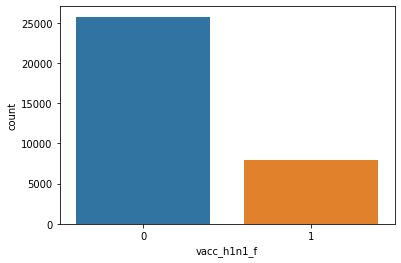

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [ ]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# ÌÉÄÍ≤ü ÏÉòÌîå Ïàò ÎßåÌÅº 0Ïù¥ Îã¥Í∏¥ Î¶¨Ïä§Ìä∏Î•º ÎßåÎì≠ÎãàÎã§. Í∏∞Ï§ÄÎ™®Îç∏Î°ú ÏòàÏ∏°
basic_model = [major] * len(y_train)

In [ ]:
# Í∏∞Ï§ÄÎ™®Îç∏Ïùò Ï†ïÌôïÎèÑ
print("training accuracy: ", accuracy_score(y_train, basic_model))

# ÎãµÏùÄ 3Î≤à 0.76

training accuracy:  0.7633365952020876


### 2) Î™®Îç∏ Í∞úÎ∞ú
- Í≤∞Ï†ïÌä∏Î¶¨Î•º ÌïôÏäµÏãúÌÇµÎãàÎã§. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏàòÏ†ïÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÎÜíÏó¨Î≥¥ÏÑ∏Ïöî. Í≥ºÏ†ÅÌï©ÏùÑ Ï£ºÏùòÌïòÏÑ∏Ïöî!
- Í≤ÄÏ¶ùÏÑ∏Ìä∏ Ïä§ÏΩîÏñ¥Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.(ÌèâÍ∞ÄÏßÄÌëúÎäî F1-scoreÏûÖÎãàÎã§, ÏàòÏãùÏùÄ Ï∫êÍ∏Ä Overview-Evaluation ÌéòÏù¥ÏßÄÎ•º ÌôïÏù∏Ìï¥ Ï£ºÏÑ∏Ïöî. ÌèâÍ∞ÄÏßÄÌëúÏóê ÎåÄÌïú ÎÇ¥Ïö©ÏùÄ Îã§ÏùåÏóê ÏûêÏÑ∏Ìûà Î∞∞Ïö∞Í≥† ÌôúÏö©Ìï† Í≤ÉÏûÖÎãàÎã§ ÏßÄÍ∏àÏùÄ Ïä§ÏΩîÏñ¥Î•º Ïò¨Î¶¨Í∏∞ ÏúÑÌïú ÎÖ∏Î†•ÏùÑ Ï†ÑÌòÄ Í∏∞Ïö∏Ïù¥ÏßÄ ÎßêÍ≥† Í≤∞Ï†ïÌä∏Î¶¨Ïùò Í∞úÎÖêÍ≥º ÏΩîÎìúÏù¥Ìï¥, ÏÇ¨Ïö©Ïóê ÏßëÏ§ëÌïòÏÑ∏Ïöî!)
- ÌäπÏÑ±Ï§ëÏöîÎèÑÎ•º Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥ Î≥¥ÏÑ∏Ïöî
- **Í≤ÄÏ¶ùÏÑ∏Ìä∏Ïùò F1-scoreÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî. (0.5 Ïù¥ÏÉÅ ÌÜµÍ≥º)**

In [ ]:
# ÏãúÎèÑ 1.
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy') 
)

# Î™®Îç∏ ÌõàÎ†®
pipe.fit(X_train, y_train)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ: ', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: ', pipe.score(X_val, y_val))

# Í≤ÄÏ¶ùÏÑ∏Ìä∏Î°ú ÌèâÍ∞Ä
y_pred = pipe.predict(X_val)
print('Í≤ÄÏ¶ù f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ÌõàÎ†® Ï†ïÌôïÎèÑ:  0.9919639415235892
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:  0.7560194520222987
Í≤ÄÏ¶ù f1:  0.5039787798408488


In [ ]:
# ÏãúÎèÑ 2.
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=4, random_state=2, criterion='entropy')
)

# Î™®Îç∏ ÌõàÎ†®
pipe.fit(X_train, y_train)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ: ', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: ', pipe.score(X_val, y_val))

# Í≤ÄÏ¶ùÏÑ∏Ìä∏Î°ú ÌèâÍ∞Ä
y_pred = pipe.predict(X_val)
print('Í≤ÄÏ¶ù f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ÌõàÎ†® Ï†ïÌôïÎèÑ:  0.8200634581739465
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:  0.8200687937373977
Í≤ÄÏ¶ù f1:  0.5451274362818591


In [ ]:
# ÏãúÎèÑ 3.
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=2, criterion='entropy')
)

# Î™®Îç∏ ÌõàÎ†®
pipe.fit(X_train, y_train)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ: ', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: ', pipe.score(X_val, y_val))

# Í≤ÄÏ¶ùÏÑ∏Ìä∏Î°ú ÌèâÍ∞Ä

y_pred = pipe.predict(X_val)
print('Í≤ÄÏ¶ù f1: ', f1_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ÌõàÎ†® Ï†ïÌôïÎèÑ:  0.8200634581739465
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ:  0.8200687937373977
Í≤ÄÏ¶ù f1:  0.5451274362818591


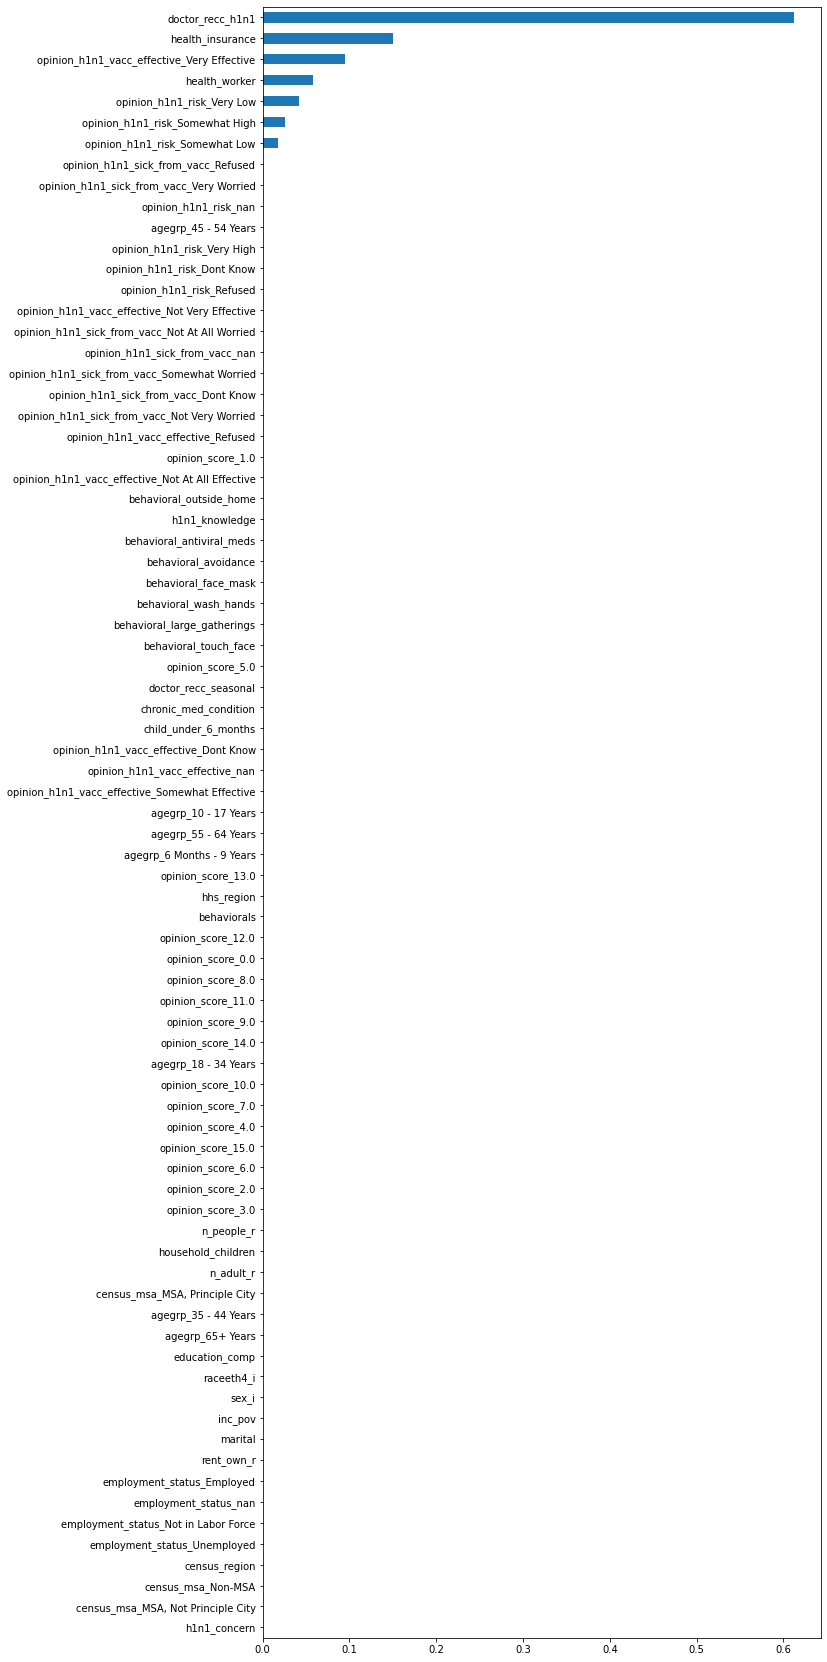

In [ ]:
# named_stepsÏúºÎ°ú ÌäπÏÑ± Ï§ëÏöîÎèÑ ÌôïÏù∏
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

model_dt = pipe.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

### 3) Ï∫êÍ∏Ä ÎåÄÌöå Ï∞∏Ïó¨

- ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï∫êÍ∏ÄÏóê Ï†úÏ∂ú ÌïòÏÑ∏Ïöî.(Ïä§ÏΩîÏñ¥Í∞Ä ÎßéÏù¥ ÎÇÆÍ≤å ÎÇòÏôÄÎèÑ Í≤∞Ï†ïÌä∏Î¶¨Î•º Ïûò Ïù¥Ìï¥ÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎÇ¥ÏóàÎã§Î©¥ Ï∂©Î∂ÑÌï©ÎãàÎã§!)
- **Ï∫êÍ∏Ä LeaderboardÏùò Î≥∏Ïù∏ ScoreÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**
 

In [ ]:
# csv ÌååÏùº Ï†ÄÏû•ÏùÑ ÏúÑÌïú Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# test Îç∞Ïù¥ÌÑ∞Ïùò featureÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°Í∞í ÎèÑÏ∂ú
y_pred_test = pipe.predict(X_test)

In [ ]:
# ÏòàÏ∏°Í∞íÏùÑ Ï†úÏ∂ú formÏóê Ï†ÄÏû•
sample_submission[target] = y_pred_test
sample_submission

Id  vacc_h1n1_f
0          0            0
1          1            0
2          2            0
3          3            0
4          4            0
...      ...          ...
28099  28099            0
28100  28100            0
28101  28101            0
28102  28102            0
28103  28103            0

[28104 rows x 2 columns]

In [ ]:
# Í∞úÏàò ÌôïÏù∏ (ÏòàÏ∏°Í∞íÏóêÏÑú 0, 1 Í∞úÏàò ÌôïÏù∏)
(y_pred_test == 0).sum(), (y_pred_test == 1).sum()

(24058, 4046)

In [ ]:
# Í∞úÏàò ÌôïÏù∏ (Ï†úÏ∂úÌèº Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 0, 1 Í∞úÏàò ÌôïÏù∏)
sample_submission[target].value_counts()

0    24058
1     4046
Name: vacc_h1n1_f, dtype: int64

In [ ]:
# Ï†ÄÏû•
sample_submission.to_csv("/content/drive/MyDrive/ds-cs-section2-sprint2-master/n221-decision-trees/submission_dana.csv", index = False)

## üî• ÎèÑÏ†ÑÍ≥ºÏ†ú

### 4) Îã§Î•∏ Ï¢ÖÎ•òÏùò imputerÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÌäπÏÑ±-ÌÉÄÍ≤ü Í¥ÄÍ≥Ñ Í∑∏ÎûòÌîÑÎ•º ÎÇòÌÉÄÎÇ¥ Î≥¥ÏÑ∏Ïöî.
- Îã§Î•∏ Ï¢ÖÎ•òÏùò imputerÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥ÏÑ∏Ïöî([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots ÏÇ¨Ïö©ÌïòÏó¨ Í¥ÄÏã¨ÏûàÎäî ÌäπÏÑ±Îì§Í≥º targetÍ∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥ Î≥¥ÏÑ∏Ïöî.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###